In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import torch

import torch.nn as nn
import torch.optim as optim

/Users/wolf/Documents/Western_PhD/phd/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# Data Import

In [2]:
data = pd.read_csv('data/heart_disease_uci.csv', index_col=0)

In [3]:
col_rename = {'age': 'Age', 'sex': 'Gender', 'dataset': 'Data Location', 'cp': 'Chest Pain Type',
              'trestbps': 'Resting Blood Pressure', 'chol': 'Cholesterol', 'fbs': 'Fasting Blood Sugar', 'restecg': 'Resting ECG',
              'thalach': 'Max Heart Rate', 'exang': 'Exercise Induced Angina', 'oldpeak': 'ST Depression induced by exercise relative to rest', 
              'slope': 'Slope of the peak exercise ST segment', 'ca': 'Number of major vessels', 'thal': 'Thalassemia', 'num': 'predicted attribute'}

In [35]:
datacopy = data.iloc[:,:-1].copy()

In [3]:
# Load dataset (UCI Heart Disease Dataset)
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
file_path = "data/data.csv"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
# df = pd.read_csv(url, names=columns, na_values='?')
df = pd.read_csv(file_path, names=columns, na_values='?')

In [6]:
data = df.copy()
df_mean = df.mean()
data = data.fillna(df_mean)

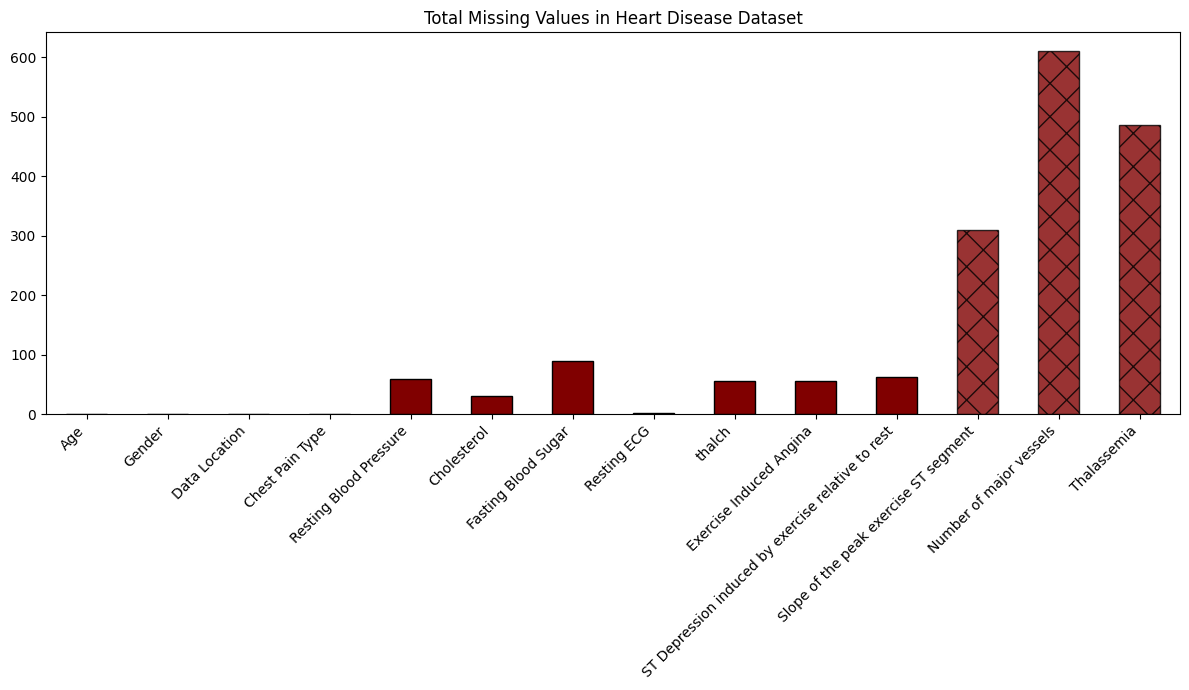

In [58]:
fig, ax = plt.subplots(figsize=(12, 7))  # Create figure and axis

# Plot missing values for all columns
bars = datacopy.rename(columns=col_rename).isna().sum(axis=0).plot(
    kind='bar', ax=ax, color='maroon', edgecolor='black')

# Apply hatching and alpha to only the last 3 bars
for i in range(-3, 0):  # Last 3 columns
    bars.patches[i].set_hatch('x')  # Apply hatch pattern
    bars.patches[i].set_alpha(0.8)  # Set transparency (0.5 is semi-transparent)
    bars.patches[i].set_color('maroon')  # Set edge color
    bars.patches[i].set_edgecolor('black')  # Set edge color

# Formatting
plt.title('Total Missing Values in Heart Disease Dataset')
plt.xticks(rotation=45, ha='right')  # Rotate labels
plt.tight_layout()  # Adjust layout

plt.savefig('plots/missing_values.png', dpi=300, bbox_inches='tight')

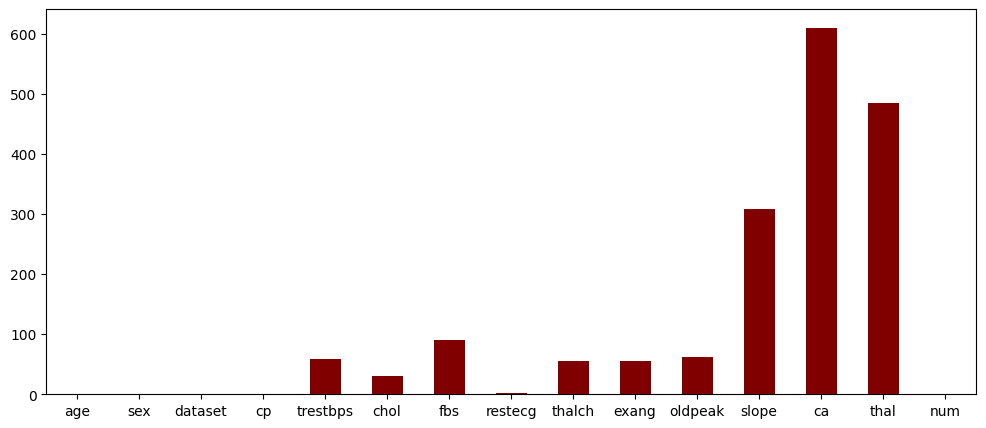

In [7]:
data.isna().sum(axis=0).plot(kind='bar', figsize=(12, 5), color='maroon')
plt.xticks(rotation=0)
plt.savefig('plots/missing_values.png')

<Axes: xlabel='id'>

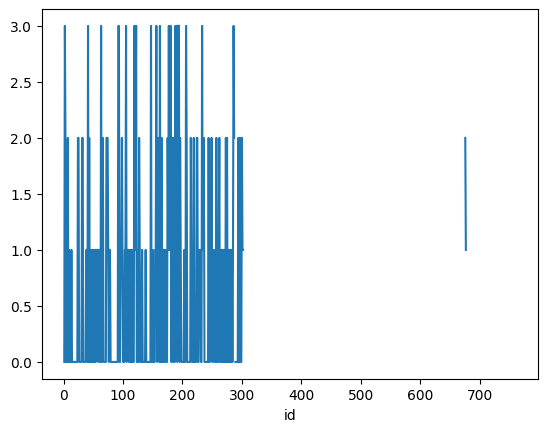

In [8]:
data['ca'].plot()


# Data Preprocessing

1: Mild heart disease.
2: Moderate heart disease.
3: Severe heart disease.
4: Very severe heart disease.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 920 entries, 1 to 920
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 115.0+ KB


In [10]:
data.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [11]:
data.drop(columns=['dataset'], inplace=True)

In [12]:
# converting value to more readable format

# Gender data is in string format, converting it to binary
data['sex'].replace('Male', 1, inplace=True)
data['sex'].replace('Female', 0, inplace=True)

# Fasting Blood Sugar data is in boolean format, converting it to binary
data['fbs'].replace(True, 1, inplace=True)
data['fbs'].replace(False, 0, inplace=True)

# Exercise Induced Angina data is in boolean format, converting it to binary
data['exang'].replace(True, 1, inplace=True)
data['exang'].replace(False, 0, inplace=True)


# data['chol'].astype(int)
data['chol'] = data['chol'][np.isfinite(data['chol'])].astype(int)
data['trestbps'] = data['trestbps'][np.isfinite(data['trestbps'])].astype(int)
data['thalch'] = data['thalch'][np.isfinite(data['thalch'])].astype(int)


/var/folders/xx/d5mgt4pn2ddgyhs6gy0jhnf00000gn/T/ipykernel_1079/2500583468.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['sex'].replace('Male', 1, inplace=True)
/var/folders/xx/d5mgt4pn2ddgyhs6gy0jhnf00000gn/T/ipykernel_1079/2500583468.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [28]:
data = data.dropna()

# Deep Convolutional Neural Network

## Deep Convolutional Neural Network (DCNN) Architecture

The architecture of the proposed DCNN model is a feed-forward network with a sequential model in which each layer is connected in a single-input and single-output manner. The heart-disease classification attribute is a binary attribute that is classified as “1” for patients having heart disease, and “0” for patients with the absence of heart disease.

### Model Architecture:
- **Convolutional Layers**: 2 convolutional layers
- **Dense Layers**: 8 fully connected dense layers
    - First four layers: 128 neurons each
    - Next three layers: 64 neurons each
    - Last layer: 1 neuron

### Activation Functions:
- **ELU (Exponential Linear Unit)**: Used in all layers except the last layer
- **Sigmoid**: Used in the last layer

### Optimizer:
- **Nadam**: Learning rate of 0.001

### Loss Function:
- **Binary Cross-Entropy**

### Training Parameters:
- **Epochs**: 100
- **Dropout Rate**: 3% to avoid overfitting

The 14 selected attributes were joined in the fully connected dense layer. Before the nonlinear transformation, these layers normalize the variables.


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, ELU, Dropout
from tensorflow.keras.optimizers import Nadam
from sklearn.metrics import precision_score, recall_score, f1_score

# Define the DCNN model architecture with dropout using TensorFlow

model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='elu', input_shape=(13, 1)),
    Conv1D(filters=64, kernel_size=3, activation='elu'),
    Flatten(),
    Dense(128, activation='elu'),
    Dropout(0.03),
    Dense(128, activation='elu'),
    Dropout(0.03),
    Dense(128, activation='elu'),
    Dropout(0.03),
    Dense(128, activation='elu'),
    Dropout(0.03),
    Dense(64, activation='elu'),
    Dropout(0.03),
    Dense(64, activation='elu'),
    Dropout(0.03),
    Dense(64, activation='elu'),
    Dropout(0.03),
    Dense(1, activation='sigmoid')
])

# Define the optimizer and loss function
optimizer = Nadam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Convert test data to numpy arrays
test_features_np = test_features.squeeze(1).numpy()
test_labels_np = test_labels.numpy()

# Print the numpy arrays
print("Test Features (numpy):", test_features_np)
print("Test Labels (numpy):", test_labels_np)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_features_np, test_labels_np, verbose=0)
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Loss: {test_loss:.4f}')

# Make predictions on the test data
predictions = model.predict(test_features_np).round()

# Replace NaN values in predictions with 0
predictions = np.nan_to_num(predictions, nan=0.0)

# Calculate precision, recall, and F1 score
precision = precision_score(test_labels_np, predictions, average='macro')
recall = recall_score(test_labels_np, predictions, average='macro')
f1 = f1_score(test_labels_np, predictions, average='macro')
conf_matrix = confusion_matrix(test_labels_np, predictions)

# Convert confusion matrix to DataFrame for better readability
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1', 'Actual 2', 'Actual 3', 'Actual 4'],
                              columns=['Predicted 0', 'Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'])

print(f'Precision: {precision:.4f}')

# Calculate and print confusion matrix
print("Confusion Matrix:")
display(conf_matrix_df)
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

/Users/wolf/Documents/Western_PhD/phd/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_10 (Conv1D)              │ (None, 11, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 9, 64)          │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 146,369 (571.75 KB)

 Trainable params: 146,369 (571.75 KB)

 Non-trainable params: 0 (0.00 B)

Test Features (numpy): [[5.90e+01 1.00e+00      nan 1.64e+02 1.76e+02 1.00e+00      nan 9.00e+01
  0.00e+00 1.00e+00      nan 2.00e+00      nan]
 [6.50e+01 0.00e+00      nan 1.55e+02 2.69e+02 0.00e+00      nan 1.48e+02
  0.00e+00 8.00e-01      nan 0.00e+00      nan]
 [6.90e+01 0.00e+00      nan 1.40e+02 2.39e+02 0.00e+00      nan 1.51e+02
  0.00e+00 1.80e+00      nan 2.00e+00      nan]
 [4.70e+01 1.00e+00      nan 1.38e+02 2.57e+02 0.00e+00      nan 1.56e+02
  0.00e+00 0.00e+00      nan 0.00e+00      nan]
 [6.10e+01 1.00e+00      nan 1.50e+02 2.43e+02 1.00e+00      nan 1.37e+02
  1.00e+00 1.00e+00      nan 0.00e+00      nan]
 [6.70e+01 1.00e+00      nan 1.52e+02 2.12e+02 0.00e+00      nan 1.50e+02
  0.00e+00 8.00e-01      nan 0.00e+00      nan]
 [5.40e+01 1.00e+00      nan 1.22e+02 2.86e+02 0.00e+00      nan 1.16e+02
  1.00e+00 3.20e+00      nan 2.00e+00      nan]
 [5.90e+01 1.00e+00      nan 1.10e+02 2.39e+02 0.00e+00      nan 1.42e+02
  1.00e+00 1.20e+00      nan 1.00e+00      nan]
 

/Users/wolf/Documents/Western_PhD/phd/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 0,24,0,0,0,0
Actual 1,14,0,0,0,0
Actual 2,8,0,0,0,0
Actual 3,9,0,0,0,0
Actual 4,2,0,0,0,0


Recall: 0.2000
F1 Score: 0.1185


In [26]:
conf_matrix_df

,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 0,24,0,0,0,0
Actual 1,14,0,0,0,0
Actual 2,8,0,0,0,0
Actual 3,9,0,0,0,0
Actual 4,2,0,0,0,0


In [31]:
pd.read_csv('data/heart_disease_uci.csv', skiprows=1)

,1,63,Male,Cleveland,typical angina,145,233,TRUE,lv hypertrophy,150,FALSE,2.3,downsloping,0,fixed defect,0.1
0,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
1,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
2,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
3,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
4,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
915,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
916,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
917,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
